<a href="https://colab.research.google.com/github/kaipak/ClassificationCompetition/blob/main/src/TeamKayak_SarcasmDetectorDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#!git clone https://github.com/kaipak/ClassificationCompetition.git drive/MyDrive/dev/ClassificationCompetition
!pip install transformers

Mounted at /content/drive


In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext tensorboard

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [15]:
import sys, os
from pathlib import Path
import random
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('drive/My Drive/dev/sarcasm_detector/src')
from model import SarcasmDetector
from data_prep import DataPrep

In [16]:
# Set Paths for Google Drive
source_folder = '/content/drive/My Drive/Data'
destination_folder = '/content/drive/My Drive/Model/Response'
train_log_dir = '/content/drive/My Drive/logs/tensorboard/train/'

In [17]:
# Prepare Data
data_prepper = DataPrep(train_path=source_folder + '/train.jsonl',
                       sub_path=source_folder + '/test.jsonl',
                       response_only=False)
data_prepper.train_test_split()
data_prepper.write_data(datapath=source_folder)

0.2 test ratio results in 4000 training, 500 validation, and 500 test observations.


In [29]:
data_prepper.df_train.head()

,label,response,context,text
1396,1,"@USER @USER A supercar group called "" Tools & ...",[Some good ideas but why are many of these tri...,"@USER @USER A supercar group called "" Tools & ..."
4329,0,@USER @USER @USER Didn ’ t your fave do a Chri...,"[xtina is not impressive she can ’ t write , h...",@USER @USER @USER Didn ’ t your fave do a Chri...
1711,1,@USER @USER @USER I see you missed the tutoria...,[Republicans vote to give police power to arre...,@USER @USER @USER I see you missed the tutoria...
2617,0,@USER @USER @USER Sure . It's Bernie's fault ....,[I think @USER bears a * LOT * of the responsi...,@USER @USER @USER Sure . It's Bernie's fault ....
4546,0,@USER @USER @USER Girl became his highest char...,"[xtina is not impressive she can ’ t write , h...",@USER @USER @USER Girl became his highest char...


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


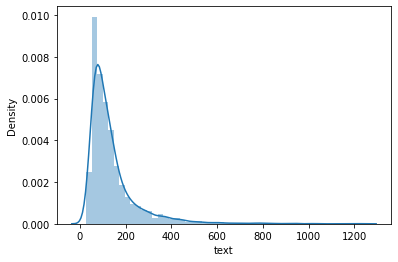

In [30]:
df = pd.read_csv(f'{source_folder}/train.csv')
sns.distplot(df['text'].str.count(" "))

In [20]:
data_prepper.df_sub.head()

,id,response,context,text,label
0,twitter_1,"@USER @USER @USER My 3 year old , that just fi...","[Well now that ’ s problematic AF <URL>, @USER...","@USER @USER @USER My 3 year old , that just fi...",1
1,twitter_2,@USER @USER How many verifiable lies has he to...,[Last week the Fake News said that a section o...,@USER @USER How many verifiable lies has he to...,1
2,twitter_3,@USER @USER @USER Maybe Docs just a scrub of a...,[@USER Let ’ s Aplaud Brett When he deserves i...,@USER @USER @USER Maybe Docs just a scrub of a...,1
3,twitter_4,@USER @USER is just a cover up for the real ha...,[Women generally hate this president . What's ...,@USER @USER is just a cover up for the real ha...,1
4,twitter_5,@USER @USER @USER The irony being that he even...,"[Dear media Remoaners , you excitedly sharing ...",@USER @USER @USER The irony being that he even...,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


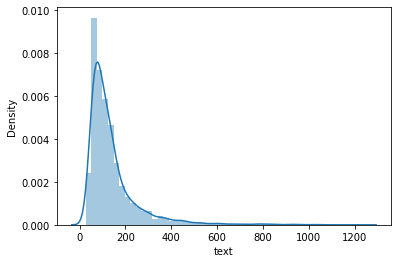

In [31]:
df = pd.read_csv(f'{source_folder}/sub.csv')
sns.distplot(data_prepper.df['text'].str.count(" "))

# Demo from best saved Model

*   $lr=5e-7$
*   $\textit{epochs}=30$
* `batch_size`=8
* `max_seq_len`=128
* response + contex



In [32]:
input_path = 'drive/MyDrive/Data'
output_path = '/content/drive/My Drive/Model/Response'
train_log_dir = 'drive/MyDrive/Output/logs/tensorboard/train'
best_model_path = 'drive/MyDrive/Model/Response/best_model.pt'
best_metrics_path = Path('drive/MyDrive/Model/Response/lr_5e-07_epochs_30_metrics.pt')

In [33]:
best_model = SarcasmDetector(tokenizer_model='bert-base-uncased',
                             model_options_name='bert-base-uncased',
                             tokenizer_do_lc=False,
                             input_dir=input_path,
                             output_dir=output_path,
                             train_log_dir=train_log_dir)
best_model.tokenize_data('train.csv', 'validate.csv', 'test.csv', batch_size=8, max_seq_len=128)

There is/are 1 GPU(s) available.
GPU Tesla V100-SXM2-16GB will be used.


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Created train, validation, and test datasets with max_seq_len=128
Created iterators with batch_size=8


Model loaded from <== /content/drive/My Drive/Model/Response/best_model.pt
Classification Report:
              precision    recall  f1-score   support

           1     0.7645    0.9032    0.8281       248
           0     0.8841    0.7262    0.7974       252

    accuracy                         0.8140       500
   macro avg     0.8243    0.8147    0.8127       500
weighted avg     0.8248    0.8140    0.8126       500



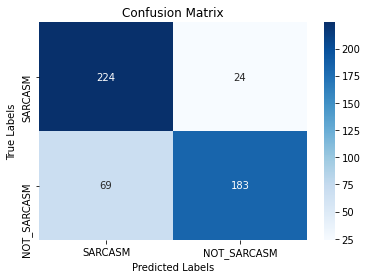

In [34]:
best_model.evaluate(model_name='best_')

In [35]:
df_sub = best_model.predict(model_name='best_', filepath='drive/MyDrive/Output/sub_kd121320.csv')
df_sub.groupby('label').size()

Model loaded from <== /content/drive/My Drive/Model/Response/best_model.pt


label
NOT_SARCASM     665
SARCASM        1135
dtype: int64

In [ ]:
df_sub.to_csv()